# Homework set 1
Sebastiaan Bye, Julius Wantenaar

In [3]:
'''
Packages
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

## Exercise 1

The pdf of the beta distribution is
$ p(z) = (1-z)^{6}(1+z)^2$.

Notice that the Jaccobi polynominal

$$P^{a,b}_n(x) = (1-x)^a(1+x)^b,$$

is the same as $p(z)$ for $a=6$ and $b=2$.

Thus, the set of polynomials that are orthogonal wrt the pdf of Z are Jacobi polynomials and the normalization constants are 6 and 2.

Special Cases of Jacobi polynomials (the first 3):
$$P^{a,b}_{0}(x) = 1$$
$$P^{a,b}_{1}(x) = (a+1)+(a+b+2)\frac{x-1}{2}$$
$$P^{a,b}_{2}(x) = \frac{(a+1)(a+2)}{2}+(a+2)(a+b+3)\frac{x-1}{2}+\frac{(a+b+3)(a+b+4)}{2}(\frac{x-1}{2})^2$$

so for $a=6$ and $b=2$, this gives:
$$P^{6,2}_{0}(x) = 1$$
$$P^{6,2}_{1}(x) = 7 + 10\frac{x-1}{2}$$
$$P^{6,2}_{2}(x) = 28+88\frac{x-1}{2}+66(\frac{x-1}{2})^2$$

In [4]:
# Define M points on the x-axis
M = 5000
X = np.linspace(-1,1,M)

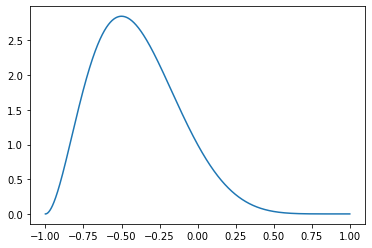

In [5]:
# Plot the pdf of the beta distribution
def beta(x):
    return (1-x)**6 * (1+x)**2

y = [beta(x) for x in X]
plt.plot(X, y)

In [6]:
# Define the first three Jacobi polynomials
def P0(x, a, b):
    return 1
def P1(x, a, b):
    return (a+1)+(a+b+2)*((x-1)/2)
def P2(x,a,b):
    return ((a+1)*(a+2)/2)+(a+2)*(a+b+3)*((x-1)/2)+((a+b+3)*(a+b+4)/2)*((x-1)/2)**2

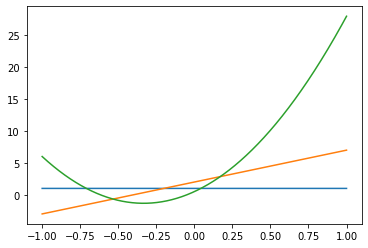

In [7]:
# Plot them
a = 6; b = 2

plt.plot(X, [P0(x, a, b) for x in X])
plt.plot(X, [P1(x, a, b) for x in X])
plt.plot(X, [P2(x, a, b) for x in X])

In [8]:
# Check if the inner product of the Jacobi polynomials that follow each other is indeed zero --> yes, almost
np.dot([P1(x, a, b) for x in X], np.array([P0(x, a, b) for x in X]) * y)

4.785823908563839e-10

In [10]:
# Check if the inner product of Jacobi polynomials that follow each other is indeed zero --> yes, almost
np.dot([P2(x, a, b) for x in X], np.array([P1(x, a, b) for x in X]) * y)

5.124069248055239e-09

In [14]:
# Check if the inner product of the beta distribution and the polynomials is indeed zero --> NO!
innerp0 = np.dot([beta(x) for x in X], np.array([P0(x, a, b) for x in X]) * y)
innerp1 = np.dot([beta(x) for x in X], np.array([P1(x, a, b) for x in X]) * y)
innerp2 = np.dot([beta(x) for x in X], np.array([P2(x, a, b) for x in X]) * y)

print(innerp0, innerp1, innerp2)

10588.702779573365 -2353.0450621274144 -4582.245647300757


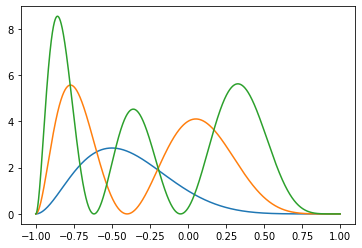

In [182]:
# Plot the polynomials times the beta distribution
a = 6; b = 2

plt.plot(X, [beta(x)*P0(x, a, b)**2 for x in X])
plt.plot(X, [beta(x)*P1(x, a, b)**2 for x in X])
plt.plot(X, [beta(x)*P2(x, a, b)**2 for x in X])

In [205]:
np.sum([beta(x)*P0(x, a, b)**2 for x in X])/M*2

2.0317257142857144

In [206]:
np.sum([beta(x)*P1(x, a, b)**2 for x in X])/M*2

3.8787490909090914

In [207]:
np.sum([beta(x)*P2(x, a, b)**2 for x in X])/M*2

5.251229538461539

In [194]:
M=100000
X = np.linspace(-1,1,M)

In [202]:
np.sum([beta(x)*P0(x, a, b)**2 for x in X])/M*2

2.0317257142857144

In [203]:
np.sum([beta(x)*P1(x, a, b)**2 for x in X])/M*2

3.8787490909090914

In [204]:
np.sum([beta(x)*P2(x, a, b)**2 for x in X])/M*2

5.251229538461539

In [ ]:
# needs nice proof

## Exercise 2

In [15]:
def function(x):
    return np.exp(2 * x + np.sin(4*x))

In [16]:
# Define domain and range
M = 5
x = np.linspace(-1, 1, M)
y = function(x)

In [17]:
# Approximate f by orthogonal projection with Legendre
proj = np.polynomial.legendre.Legendre.fit(x, y, 5)

# Approximate f by interpolation
poly = lagrange(x, y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/polynomial/legendre.py:1411: RankWarning: The fit may be poorly conditioned
  return pu._fit(legvander, x, y, deg, rcond, full, w)


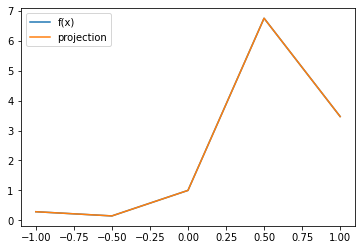

In [18]:
plt.plot(x, y, label = 'f(x)')
plt.plot(x, proj(x), label = 'projection')
plt.legend()
plt.show()

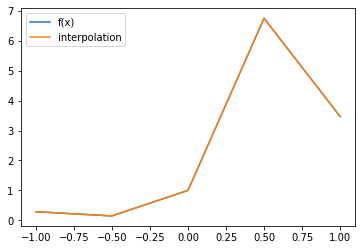

In [19]:
plt.plot(x, y, label = 'f(x)')
plt.plot(x, Polynomial(poly.coef[::-1])(x), label = 'interpolation')
plt.legend()
plt.show()

#### What is the approximation error in both cases?

L2 norm implementeren

In [254]:
# Compute the approximation error of orthogonal projection
np.linalg.norm(function(x) - proj(x), 2)

1.779816412265263e-14

In [255]:
# Compute the approximation error of interpolation
np.linalg.norm(function(x) - Polynomial(poly.coef[::-1])(x), 2)

3.2097016151842217e-15

#### How does the error change when the order (degree) of approximation is increased?

In [22]:
for i in range (1,7): 
    # Approximate f by orthogonal projection with Legendre
    proj = np.polynomial.legendre.Legendre.fit(x, y, i)

    # Compute the approximation error of orthogonal projection
    error = np.linalg.norm(function(x) - proj(x), 2)
    
    print("order:", i, "error:", error)

order: 1 error: 3.8371308363232037
order: 2 error: 3.8192027730396405
order: 3 error: 2.1312098226518352
order: 4 error: 5.078966988977447e-15
order: 5 error: 1.5160871846395875e-14
order: 6 error: 6.838300185111783e-15


Answer: there is a sudden switch from order 3 to 4, where the error is first of order $10^0$, but decreases suddenly to $10^{-15}$.